<a href="https://colab.research.google.com/github/kazuki-de/git_reserch_code/blob/master/Autoencoder_tensorflow2_0_bigginer_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Activation , Softmax, MaxPool2D,UpSampling2D
from tensorflow.keras import Model
import datetime
#import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

     |████████████████████████████████| 348.9MB 69kB/s 
     |████████████████████████████████| 3.1MB 14kB/s 
     |████████████████████████████████| 501kB 51.4MB/s 


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
inputs = Input(shape=(256,256,3))

# a layer instance is callable on a tensor, and returns a tensor
x = Conv2D(8,(7,7),padding="same", activation='relu', name='Conv1')(inputs)
x = MaxPool2D((2, 2), padding='same', name='Maxpool1')(x)
x = Conv2D(16,(5,5), padding="same",activation='relu', name='Conv2')(x)
x = MaxPool2D((2, 2), padding='same', name='Maxpool2')(x)
x = Conv2D(16,(3,3),padding="same", activation='relu', name='Conv3')(x)
x = MaxPool2D((2, 2), padding='same', name='Maxpool3')(x)
#x = Conv2D(83,3),padding="same", activation='relu', name='Conv8')(x)
#x = MaxPool2D((2, 2), padding='same', name='Maxpool8')(x)
#x = Conv2D(4,(3,3),padding="same", activation='relu', name='Conv10')(x)
#x = MaxPool2D((2, 2), padding='same', name='Maxpool10')(x)

#x = Conv2D(4,(3,3),padding="same", activation='relu', name='Conv11')(x)
#x = UpSampling2D((2, 2), name='Upsumpl11')(x)
#x = Conv2D(8,(3,3),padding="same", activation='relu', name='Conv9')(x)
#x = UpSampling2D((2, 2), name='Upsumpl9')(x)
x = Conv2D(16,(3,3),padding="same", activation='relu', name='Conv4')(x)
x = UpSampling2D((2, 2), name='Upsumpl1')(x)
x = Conv2D(16,(5,5), padding='same',activation='relu', name='Conv5')(x)
x = UpSampling2D((2, 2), name='Upsumpl2')(x)
x = Conv2D(8,(7,7), padding='same',activation='relu', name='Conv6')(x)
x = UpSampling2D((2, 2), name='Upsumpl3')(x)
decode = Conv2D(3,(3,3), padding='same',activation='relu', name='Conv7')(x)


# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs, decode)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
#model.fit(data, labels)  # starts training

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 256, 256, 8)       1184      
_________________________________________________________________
Maxpool1 (MaxPooling2D)      (None, 128, 128, 8)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 128, 128, 16)      3216      
_________________________________________________________________
Maxpool2 (MaxPooling2D)      (None, 64, 64, 16)        0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 64, 64, 16)        2320      
_________________________________________________________________
Maxpool3 (MaxPooling2D)      (None, 32, 32, 16)        0     

In [0]:
class ImageDataGenerator2(object):
    def __init__(self):
        self.images = []
        self.labels = []
        #file_pathはメタCSVでーたのこと

    def flow_from_directory(self, file_path, classes, batch_size=8):
        tmp_images = np.zeros((batch_size, 256, 256, 3))
        tmp_labels = np.zeros((batch_size, 3))

        # LabelEncode(classをint型に変換)するためのdict\n",
        classes = {v: i for i, v in enumerate(sorted(classes))}
        file_path1 = pd.read_csv(file_path)
        file_path2 = file_path1
        length = len(file_path2)
        while True:
            # ディレクトリから画像のパスを取り出すcount = 0
            count = 0
            bin8 = np.arange(batch_size,length,batch_size)
            hoge = np.arange(length)
            np.random.shuffle(hoge)
            batch10 = np.split(hoge, bin8)
            #print(len(batch10))
            for ic, bbb in enumerate(batch10):
                #print(bbb)
                print(str(ic),"回目です")
                for ib,bb in enumerate(bbb):
                    #print(ib, bb)
                    #print(bb)
                    path = file_path2.loc[bb]["base_path"]
                    path = "/content/drive/My Drive/256_choice/"+path
                    with Image.open(path) as f:
                        tmp_images[ib] = np.asarray(f, dtype=np.float32)/255
                    label = file_path2.loc[bb]["type"]
                    #tmp_labels[ib] = to_categorical(classes[label],len(classes))
                #print(tmp_labels, np.mean(tmp_images, axis=(1,2,3)))
                #print(tmp_images.shape())
                yield tmp_images, tmp_images
      #validation_data=test_datagen.flow_from_directory(test_dir, classes),
    #validation_steps=104/batchsize,
    #callbacks = [modelCheckpoint]             

In [0]:
x = pd.read_csv("/content/drive/My Drive/2048pix_tissue_choice/tran_6000.csv")

In [0]:
modelCheckpoint = ModelCheckpoint(filepath ="/content/drive/My Drive/research_/weight_autoencoder_2048_0827/my_model_weights_autoencoder_biginer_256.h5",
                                  monitor = "loss",
                                  verbose=1,
                                  save_best_only = True,
                                  save_weights_only = False,
                                  mode = "min",
                                  save_freq =500)

In [0]:
x = pd.read_csv("/content/drive/My Drive/2048pix_tissue_choice/tran_6000.csv")
train_dir = "/content/drive/My Drive/256_choice/256_3000.csv"
#test_dir = "/mnt/Doc/2048pix_tissue_all/val_400.csv"
train_len = len(pd.read_csv(train_dir))
print(train_len)
#test_len = len(pd.read_csv(test_dir))
#test_datagen = ImageDataGenerator2()
train_datagen = ImageDataGenerator2()
classes =["PI","PP","TRU"]
batchsize = 8
model.fit_generator(
    generator=train_datagen.flow_from_directory(train_dir,classes),
    steps_per_epoch=3000/8,
    epochs=10,
    verbose=2
    )
#callbacks = [modelCheckpoint] 

3000
Epoch 1/10
0 回目です
1 回目です
2 回目です
3 回目です
4 回目です
5 回目です
6 回目です
7 回目です
8 回目です
9 回目です
10 回目です
11 回目です
12 回目です
13 回目です
14 回目です
15 回目です
16 回目です
17 回目です
18 回目です
19 回目です
20 回目です
21 回目です
22 回目です
23 回目です
24 回目です
25 回目です
26 回目です
27 回目です
28 回目です
29 回目です
30 回目です
31 回目です
32 回目です
33 回目です
34 回目です
35 回目です
36 回目です
37 回目です
38 回目です
39 回目です
40 回目です
41 回目です
42 回目です
43 回目です
44 回目です
45 回目です
46 回目です
47 回目です
48 回目です
49 回目です
50 回目です
51 回目です
52 回目です
53 回目です
54 回目です
55 回目です
56 回目です
57 回目です
58 回目です
59 回目です
60 回目です
61 回目です
62 回目です
63 回目です
64 回目です
65 回目です
66 回目です
67 回目です
68 回目です
69 回目です
70 回目です
71 回目です
72 回目です
73 回目です
74 回目です
75 回目です
76 回目です
77 回目です
78 回目です
79 回目です
80 回目です
81 回目です
82 回目です
83 回目です
84 回目です
85 回目です
86 回目です
87 回目です
88 回目です
89 回目です
90 回目です
91 回目です
92 回目です
93 回目です
94 回目です
95 回目です
96 回目です
97 回目です
98 回目です
99 回目です
100 回目です
101 回目です
102 回目です
103 回目です
104 回目です
105 回目です
106 回目です
107 回目です
108 回目です
109 回目です
110 回目です
111 回目です
112 回目です
113 回目です
114 回目です
115 回目です
116 回目です
117 回目です
118 回目です
119 回目です
120 回目です
121 回

In [0]:
model.save_weights('/content/drive/My Drive/research_/weight_autoencoder_2048_0827/256_weight.h5')


In [0]:
model.load_weights('/content/drive/My Drive/research_/weight_autoencoder_2048_0827/256_weight.h5')


In [0]:
import pandas as pd

In [0]:
intermediante_layer_model = Model(inputs=model.input, outputs=model.get_layer("Maxpool3").output)


In [5]:
file_path1 = pd.read_csv("/content/drive/My Drive/256_choice/256_3000.csv")
file_path1 =file_path1[400:410]
print(file_path1.head())
tmp_images = np.zeros((len(file_path1), 256, 256, 3))
count = 400
for i in range(10):
    path = file_path1.loc[count]["base_path"]
    print(path)
    path = "/content/drive/My Drive/256_choice/"+path
    count+=1
    with Image.open(path) as f:
        tmp_images[i] = np.asarray(f, dtype=np.float32)/255

    type  ...                                  base_path
400  TRU  ...    TRU/TCGA-75-6212-01A-01-TS1/20_5_4.jpeg
401  TRU  ...  TRU/TCGA-50-6597-01A-01-TS1/17_20_12.jpeg
402  TRU  ...    TRU/TCGA-44-7659-01A-01-BS1/14_9_4.jpeg
403  TRU  ...    TRU/TCGA-49-4512-11A-01-TS1/1_7_14.jpeg
404  TRU  ...    TRU/TCGA-71-6725-01A-01-TS1/10_6_7.jpeg

[5 rows x 6 columns]
TRU/TCGA-75-6212-01A-01-TS1/20_5_4.jpeg
TRU/TCGA-50-6597-01A-01-TS1/17_20_12.jpeg
TRU/TCGA-44-7659-01A-01-BS1/14_9_4.jpeg
TRU/TCGA-49-4512-11A-01-TS1/1_7_14.jpeg
TRU/TCGA-71-6725-01A-01-TS1/10_6_7.jpeg
PI/TCGA-73-7499-01A-01-BS1/6_2_0.jpeg
TRU/TCGA-44-6147-01A-01-BS1/2_10_10.jpeg
TRU/TCGA-71-6725-01A-01-TS1/4_4_2.jpeg
TRU/TCGA-91-7771-01A-01-TS1/11_14_13.jpeg
PI/TCGA-91-6847-01A-01-BS1/4_7_11.jpeg


In [0]:
y = model.predict(tmp_images)

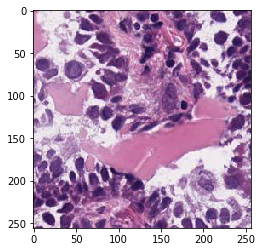

In [7]:
import matplotlib.pyplot as plt
import random
plt.imshow(tmp_images[2])
#plt.imshow(y[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


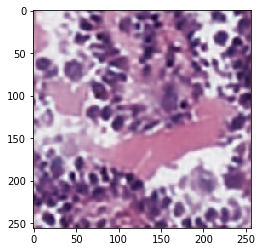

In [8]:
plt.imshow(y[2])

In [0]:
 pre2 = intermediante_layer_model .predict(tmp_images[1:3])

In [15]:
pre2[1].shape

(32, 32, 16)

In [0]:
n = 

In [0]:
file_path1 = pd.read_csv("/content/drive/My Drive/256_choice/256_3000.csv")
tmp = np.zeros((10, 256, 256, 3))
tmp1 = np.zeros((1000, 32, 32, 16))
tmp2 = np.zeros(1000)
list1 = []
count = 0
count1 =0
classes =["PI","PP","TRU"]
classes = {v: i for i, v in enumerate(sorted(classes))}
for m in range(100):
    for i in range(10):
        path1 = file_path1.loc[count]["base_path"]
        path = "/content/drive/My Drive/256_choice/"+path1
        print(count,"ファイルナンバー")
        count+=1
        with Image.open(path) as f:
            tmp[i] = np.asarray(f, dtype=np.float32)/255
    y = intermediante_layer_model.predict(tmp)
    for l in range(10):
        tmp1[count1] = y[l]
        type1 = file_path1.loc[count1]["type"]
        tmp2[count1]= classes[type1]
        print(count1,"画像処理枚数")
        count1+=1

In [60]:
np.save("/content/drive/My Drive/autoencoder_feature/2048pix/1000_64_64_4.npy",tmp1)
np.save("/content/drive/My Drive/autoencoder_feature/2048pix/1000_label.npy",tmp2)


KeyboardInterrupt: ignored

In [65]:
tmp1.shape

(1000, 32, 32, 16)

In [0]:
taaaa = sum(tmp1[1])

In [0]:
#主成分分析用の配列作成
feature = np.zeros((1000, 16))
for i in range(1000):
    taaa = sum(tmp1[i])
    taa = sum(taaa)
    feature[i] = taa

In [0]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [0]:
pca = PCA()
feature1 = pca.fit(feature)
# データを主成分空間に写像
feature1 = pca.transform(feature)

In [88]:
feature1

array([[-9.97007001e+00, -1.34479608e+01, -1.98673492e+01, ...,
        -1.13948592e+00,  2.73586544e-01,  1.70302959e-01],
       [ 8.59423343e+01, -7.36224194e+01, -5.32944217e+01, ...,
        -2.79430279e-01,  6.87875722e-02, -1.14283732e+00],
       [ 9.69068911e+00, -3.85146221e+01,  1.71958076e+01, ...,
        -1.13683371e+00,  4.39506434e-01, -2.21465767e-01],
       ...,
       [-1.42627345e+02, -1.64262298e+01, -6.64174573e+01, ...,
         5.25668424e-01,  1.27884482e-01, -4.15252996e-01],
       [ 4.42059604e+01,  5.80659136e+01, -2.74525358e+01, ...,
         1.05998906e+00, -4.83310123e-01,  2.05760687e-01],
       [-9.50391963e+01, -3.08181182e+01,  1.11840505e+01, ...,
        -3.57743351e-01, -3.62978677e-02, -2.49714156e-02]])

In [89]:
pd.DataFrame(feature1, columns=["PC{}".format(x + 1) for x in range(16)]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-9.970070,-13.447961,-19.867349,-0.989070,-4.668264,2.722486,-1.080604,1.994449,-0.000196,1.405392,0.307922,-1.007512,0.194894,-1.139486,0.273587,0.170303
1,85.942334,-73.622419,-53.294422,2.816775,3.905580,-2.997547,0.148080,-0.777008,1.569179,-0.541434,-1.774703,-1.177268,0.825296,-0.279430,0.068788,-1.142837
2,9.690689,-38.514622,17.195808,7.433963,5.125243,4.324236,1.156462,2.037094,1.620491,0.979672,0.067789,-0.537059,-0.765617,-1.136834,0.439506,-0.221466
3,-66.757034,-0.692045,7.561943,-3.830927,3.626309,-1.700559,-1.139104,1.860652,2.382393,0.575078,-1.028462,0.416122,0.079529,0.125911,0.195595,-0.194807
4,-117.943342,-23.984681,19.813386,0.788174,-1.650499,-0.401803,3.811580,-1.101948,0.384621,-0.600908,-1.047257,-0.086976,0.240571,-0.438457,0.050739,0.028144


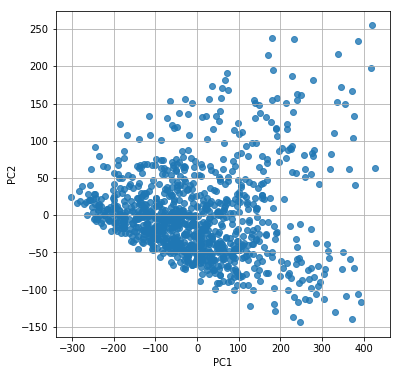

In [91]:
plt.figure(figsize=(6, 6))
plt.scatter(feature1[:, 0], feature1[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [0]:
tmp3 = np.zeros((1000, 64*64*4))
for i in range(tmp1.shape[0]):
    tmp3[i] = tmp1[i].flatten()

In [0]:
tmp3.shape

(1000, 16384)

In [0]:
np.save("/content/drive/My Drive/autoencoder_feature/2048pix/1000_flatten.npy",tmp3)


In [0]:
pic = np.load("/content/drive/My Drive/autoencoder_feature/2048pix/1000_64_64_4.npy")
label = np.load("/content/drive/My Drive/autoencoder_feature/2048pix/1000_label.npy")
flatten = np.load("/content/drive/My Drive/autoencoder_feature/2048pix/1000_flatten.npy")

In [0]:
%pip install pyclustering
import pyclustering
from pyclustering.cluster import xmeans
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

     |████████████████████████████████| 2.5MB 2.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.9.1-cp36-none-any.whl size=2495519 sha256=79453887b4a050acee9159d628a46a7d2129a24f64d59ffe59611ce5e7708dc1
  Stored in directory: /root/.cache/pip/wheels/cd/ba/70/aa5549e7b36f4a06458e560e727f87503f9f6cf07568c4b2c7
Successfully built pyclustering


In [0]:
initializer = xmeans.kmeans_plusplus_initializer(data=flatten, amount_centers=2)
initial_centers = initializer.initialize()
xm = xmeans.xmeans(data=flatten, initial_centers=initial_centers)
xm.process()

In [0]:
clusters = xm.get_clusters()
pyclustering.utils.draw_clusters(data=flatten, clusters=clusters)

In [0]:
from random import randint

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt

In [0]:
CLUSTERS = 3
N_JOBS = 2

model = KMeans(n_clusters=CLUSTERS, n_jobs=N_JOBS).fit(flatten)
print(model.labels_)

[1 2 2 2 1 2 2 2 2 2 1 0 1 1 1 2 1 2 2 2 2 1 2 1 2 2 0 1 2 2 0 1 2 1 2 2 2
 2 1 2 2 2 1 2 1 2 1 0 2 2 1 1 2 2 2 1 2 1 1 0 1 1 2 1 2 2 0 2 2 2 0 1 1 2
 2 1 1 2 1 2 2 1 2 1 2 2 2 2 2 2 1 2 0 2 2 2 2 2 1 1 2 1 2 0 2 2 2 2 2 2 2
 2 0 0 2 1 1 0 1 2 2 2 2 2 0 2 2 2 2 0 0 2 2 0 2 2 2 2 2 1 2 2 0 1 1 2 2 1
 0 2 0 0 1 1 1 2 0 0 1 0 1 2 0 0 0 0 2 0 1 1 2 2 2 2 1 2 2 2 2 0 2 0 1 1 0
 2 2 2 2 2 0 2 1 1 2 0 0 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 0 1 2 1 1
 1 1 1 2 2 2 2 1 2 1 0 1 2 1 1 1 1 0 0 2 1 2 2 1 2 2 2 1 2 2 1 1 0 2 2 2 2
 1 1 2 2 1 2 2 1 1 0 0 2 2 1 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 0 1 1 1 2 2 2 2
 2 0 1 1 2 2 2 1 2 2 1 2 2 2 2 2 1 0 2 1 2 1 2 1 2 2 2 2 2 1 2 0 1 1 2 0 1
 1 2 1 2 2 2 2 1 2 2 0 1 1 0 2 1 2 2 0 1 2 1 1 1 2 1 2 2 0 2 0 2 2 1 1 2 1
 2 1 2 1 1 0 2 1 2 1 1 2 1 2 1 2 2 0 1 2 1 1 2 2 1 0 2 2 1 0 1 2 2 0 1 2 2
 1 0 2 0 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 2 0 2 0 1 0 2 2 0 1 1 2 2 2 2 1 1 2
 1 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 1 1 0 2 0 1 2 2 1 1 1 1 1 1 1 1 1 0 1 2 2
 1 2 0 0 2 1 2 0 1 1 2 1 

In [0]:
pca = PCA(n_components=2)
pca.fit(flatten)
pca_data = pca.fit_transform(flatten)


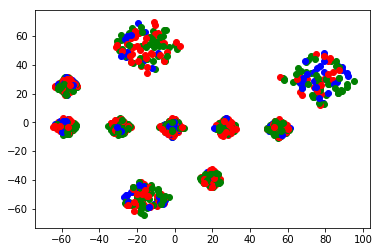

In [0]:
color = ["red", "blue", "green"]

# クラスタリング結果のプロット
plt.figure()
for i in range(pca_data.shape[0]):
    plt.scatter(pca_data[i,0], pca_data[i,1], c=color[int(model.labels_[i])])

In [0]:
data.shape

(1000, 2)